## 基於模板的匹配（Template-based Matching）
模板匹配(match template)是一種尋找與模板圖像（或稱為裁片）相似的圖像區域的技術。在進行模板匹配時，我們需要使用兩張圖像：

1. 原始圖像：這張圖像是我們希望在其中找到與模板圖像匹配的位置。原始圖像通常是一張完整的大圖。
2. 模板圖像：這是用來與原始圖像進行匹配的小圖像，也可以稱之為樣本。模板圖像包含我們想要在原始圖像中找到的特定形狀、結構或特徵。

左圖為原始圖片，中間為模板，右圖為匹配結果，紅色方框為與模板相匹配的區域。模板匹配的過程是將模板圖像在原始圖像上滑動，從左至右、從上至下，並在每個位置上比較模板圖像和原始圖像的相似度。通常，我們使用某種相似性度量來衡量兩張圖像之間的相似程度，比如均方差（Mean Squared Error, MSE）或相關性係數（Correlation Coefficient）。最終，找到相似度最高的位置即為匹配位置。

### OpenCV 中模板比對
OpenCV中常用的幾種模板匹配方法及其演算法，這些方法在OpenCV中都有相應的函數，可以根據具體的應用場景和需求選擇適合的方法。

- TM_SQDIFF：平方差匹配法。這種方法計算模板圖像和原始圖像的每個像素之間的差的平方，並找到平方和最小的位置。
- TM_SQDIFF_NORMED： 正規化平方差匹配法。這種方法計算歸一化的平方差，並找到歸一化平方和最小的位置。
- TM_CCORR：相關性匹配法。這種方法計算模板圖像和原始圖像的每個像素之間的相關性，並找到相關性最大的位置。
- TM_CCORR_NORMED： 正規化相關性匹配法。這種方法計算歸一化的相關性，並找到歸一化相關性最大的位置。
- TM_CCOEFF： 相關係數匹配法。這種方法計算模板圖像和原始圖像之間的相關係數，並找到相關係數最大的位置。
- TM_CCOEFF_NORMED： 正規化相關係數匹配法。這種方法計算歸一化的相關係數，並找到歸一化相關係數最大的位置。

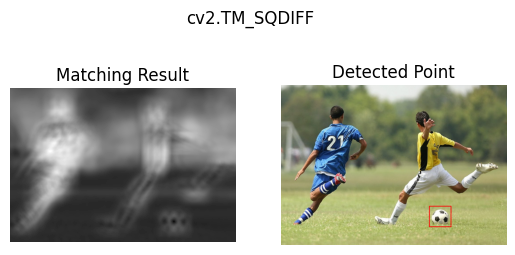

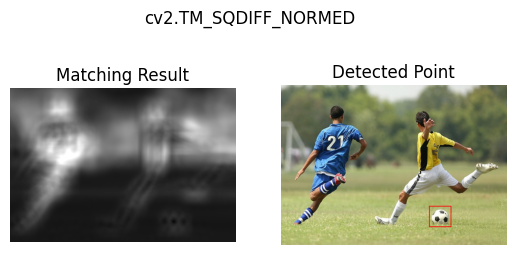

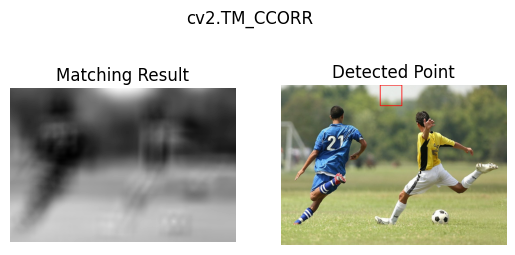

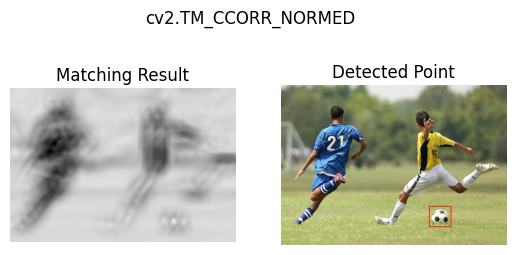

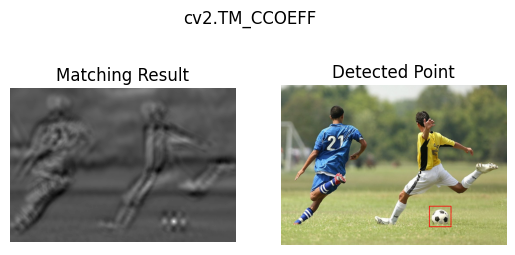

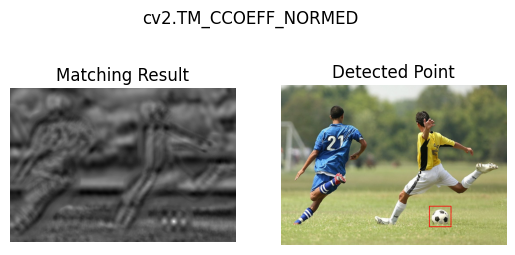

In [2]:
# ref: https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 原始圖像
img_rgb = cv2.imread('./v4/images/demo3.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
# 模板圖像(比對項目)
template = cv2.imread('./v4/images/demo3-1.png', cv2.IMREAD_GRAYSCALE)
w, h = template.shape[::-1]
 
# All the 6 methods for comparison in a list
methods = ['cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED', 'cv2.TM_CCORR',
 'cv2.TM_CCORR_NORMED', 'cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED']
# methods = ['cv2.TM_CCOEFF_NORMED']
 
for meth in methods:
    img = img_rgb.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, (0,0,255), 2)
    # plt.figure(figsize=(10, 10))
    plt.subplot(121)
    plt.imshow(res, cmap='gray')
    plt.axis('off')
    plt.title('Matching Result')
    plt.subplot(122)
    plt.imshow(img[:, :, ::-1])
    plt.axis('off')
    plt.title('Detected Point')
    plt.suptitle(meth)
    plt.subplots_adjust(top=1.2)
    cv2.imwrite('res.png',img)
    plt.show()

### 各種方法測試結果
每種方法依據評估指標不同有望小或望大評估方式，例如 TM_SQDIFF 和 CV_TM_SQDIFF_NORMED 的分數越小越好 ，即顏色越深越佳。而其餘四種方法則是數值越高代表關聯程度越大，即白色亮點區域。

### Template Matching with Multiple Objects
在上一個範例中，我們搜尋了足球的圖像，在圖像中只出現了一次。假設想搜尋一個多次出現的對象，cv.minMaxLoc()不會給出所有的位置。在這種情況下，我們將使用一個閾值判斷物件是否存在。在這個例子中，我們將使用棋盤的截圖，我們將在其中找到白色棋子。使用 CCOEFF_NORMED 搭配信心水準，篩選圖像中多個感興趣物件。

找到22個感興趣物件


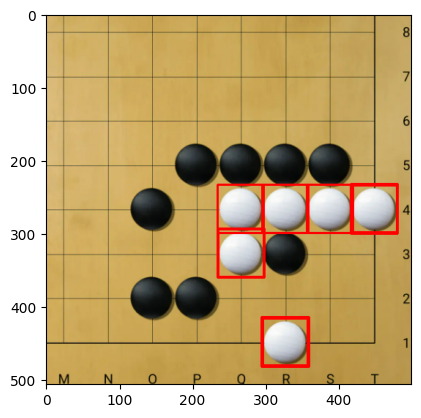

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 原始圖像
img_rgb = cv2.imread('./v4/demo/demo4.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
# 模板圖像(比對項目)
template = cv2.imread('./v4/demo/demo4-1.png', cv2.IMREAD_GRAYSCALE)
w, h = template.shape[::-1]
 
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.94
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
print(f'找到{len(loc[0])}個感興趣物件')

# plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(img_rgb[:, :, ::-1])
# cv.imwrite('res.png',img_rgb)

找到1個感興趣物件


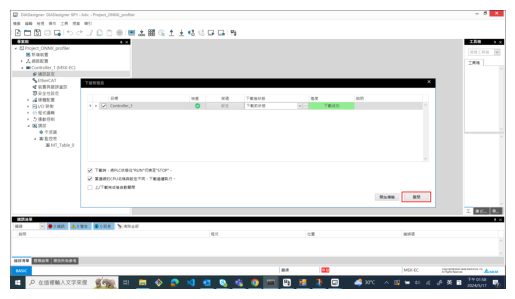

In [45]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 原始圖像
img_rgb = cv2.imread('./v4/images/out_1.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
# 模板圖像(比對項目)
template = cv2.imread('./v4/images/close.png', cv2.IMREAD_GRAYSCALE)
w, h = template.shape[::-1]
 
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.75
loc = np.where( res >= threshold)
loc = np.column_stack(loc[::-1])
print(f'找到{len(loc)}個感興趣物件')
if (len(loc)>0):
    cv2.rectangle(img_rgb, loc[0], (loc[0][0] + w, loc[0][1] + h), (0,0,255), 2)
plt.axis('off')
plt.imshow(img_rgb[:, :, ::-1])

## 結構化封裝

In [60]:
# ref: https://github.com/Sri-Sai-Charan/Template-Matching/blob/main/Template_matching.ipynb
import numpy as np
import cv2
import matplotlib.pyplot as plt

def sum_of_squared_differences(image, template):
    I, T = image.astype('float'),template.astype('float')
    H, W = I.shape[0], I.shape[1]
    h, w = T.shape[0], T.shape[1]
    R = np.ones_like(image)*np.inf
    
    for i in range(W-w):
        for j in range(H-h):
            t = (I[j: j+h, i: i+w] - T).ravel()
            R[j, i] = t.dot(t)
    return R

def template_matching(image, template, method='cv2.TM_CCOEFF_NORMED'):
    # R = sum_of_squared_differences(image, template)
    method = eval(method)
    R = cv2.matchTemplate(image, template, method)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        R = -R
    _, _, min_loc, max_loc = cv2.minMaxLoc(R)
    top_left = max_loc
    h,w = template.shape
    bottom_right = (top_left[0] + w, top_left[1] + h)
    return R, top_left,bottom_right

def plot_image(map_puzzle,top_left,bottom_right):
    region_of_interest = map_puzzle[top_left[1] : bottom_right[1], top_left[0] : bottom_right[0]]
    mask = np.zeros(map_puzzle.shape, dtype = "uint8")
    image_map = cv2.addWeighted(map_puzzle, 0.3, mask, 0.7, 0)
    image_map[top_left[1] : bottom_right[1], top_left[0] : bottom_right[0]] = region_of_interest
    final_result = cv2.cvtColor(image_map, cv2.COLOR_RGB2BGR)
    cv2.rectangle(final_result, top_left, bottom_right, (255,0,0),2)
    return final_result

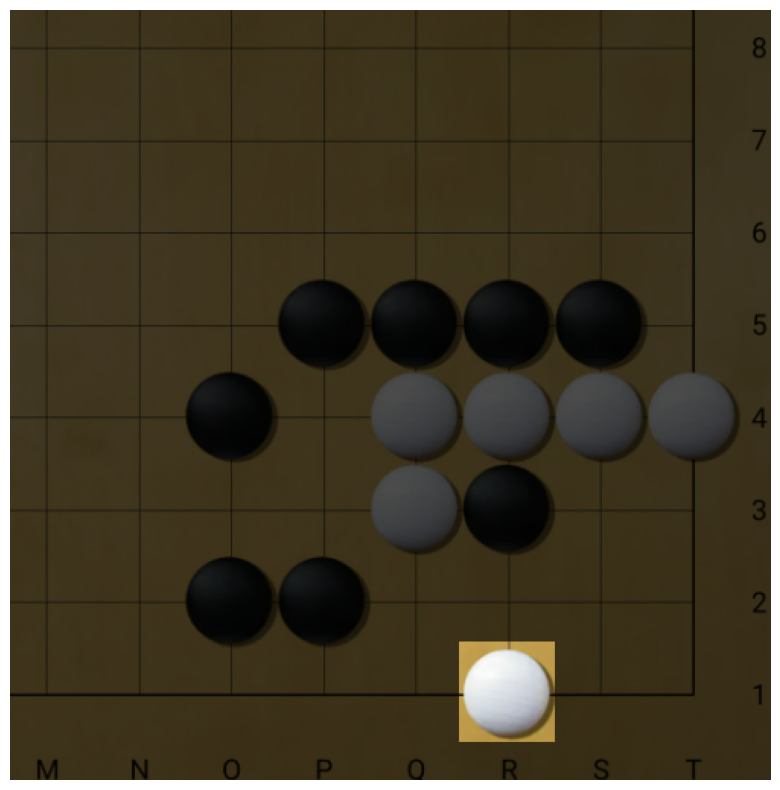

In [59]:
# 原始圖像
img_rgb = cv2.imread('./v4/images/demo4.png')
img_gray = cv2.cvtColor(img_rgb.copy(), cv2.COLOR_BGR2GRAY)
# 模板圖像(比對項目)
template = cv2.imread('./v4/images/demo4-1.png', cv2.IMREAD_GRAYSCALE)
R,  top_left,bottom_right = template_matching(img_gray, template, method='cv2.TM_SQDIFF')
result = plot_image(img_rgb,top_left,bottom_right)
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(result)

使用cv.matchTemplate(), cv.minMaxLoc()與方式，當模板在圖片中被縮放或旋轉後，匹配成效不佳。但實際應用中，物件在3D範圍內很常會被縮放或旋轉，就無法使用上述模板匹配方式。